<a href="https://colab.research.google.com/github/AritraSarkar1203/AIML-Model-For-BinaryDistillation/blob/main/AIML_Model_for_BInaryDistillation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load the dataset

In [ ]:
import pandas as pd
df = pd.read_excel('/content/Distillation dataset.xlsx')

In [ ]:
from sklearn.utils import shuffle

df_shuffled = shuffle(df, random_state=42)

In [ ]:
df_shuffled.to_excel('reshuffled_dataset.xlsx', index=False)

In [ ]:
df_reshuffled = pd.read_excel('/content/reshuffled_dataset.xlsx')

In [ ]:
X = df_reshuffled.iloc[:, :3]
y = df_reshuffled.iloc[:, -2:]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Build and train polynomial regression model




In [ ]:
print(df_shuffled.columns)

Index(['F', 'Xf', 'RD', 'xD', 'Rduty ', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [ ]:
X = df_shuffled[['F', 'Xf', 'RD']]
y = df_shuffled['Rduty ']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

X_test_poly = polynomial_features.transform(X_test)
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 98863.85048808437
R-squared: 0.07674181159485982


In [ ]:
df = pd.read_excel('/content/Distillation dataset.xlsx')
display(df.head())
df.info()

,F,Xf,RD,xD,Rduty,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1000.0,0.5,2.215,0.5,1816.47,NaN,NaN,NaN,NaN
1,1000.0,0.5,2.215,0.5,1614.64,NaN,NaN,NaN,NaN
2,1000.0,0.5,2.215,0.5,1412.81,NaN,NaN,NaN,NaN
3,1000.0,0.5,2.215,0.5,1210.98,NaN,NaN,NaN,NaN
4,1000.0,0.5,2.215,0.5,1009.15,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   F           510 non-null    float64
 1   Xf          510 non-null    float64
 2   RD          510 non-null    float64
 3   xD          510 non-null    float64
 4   Rduty       510 non-null    float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  1 non-null      float64
dtypes: float64(9)
memory usage: 36.0 KB


**Reasoning**:
Based on the `df.info()` output, columns 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', and 'Unnamed: 8' have mostly or entirely missing values and are not relevant to the task. I will drop these columns and then select the first three columns as features and the last two columns as targets.



In [ ]:
df_cleaned = df.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'])
X = df_cleaned.iloc[:, :3]
y = df_cleaned.iloc[:, -2:]
display(X.head())
display(y.head())

,F,Xf,RD
0,1000.0,0.5,2.215
1,1000.0,0.5,2.215
2,1000.0,0.5,2.215
3,1000.0,0.5,2.215
4,1000.0,0.5,2.215


,xD,Rduty
0,0.5,1816.47
1,0.5,1614.64
2,0.5,1412.81
3,0.5,1210.98
4,0.5,1009.15


## Implement multi-output strategy



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

X_test_poly = polynomial_features.transform(X_test)
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: [98863.85048808]
R-squared: [0.07674181]


## Define models




In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the baseline polynomial regression model pipeline
poly_reg_model = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# Instantiate tree-based models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)



## Tune hyperparameters

Tune hyperparameters for each model using cross-validation (grid, random, or Bayesian search).


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Polynomial Regression
poly_param_grid = {
    'polynomial_features__degree': [1, 2, 3]
}

# Use GridSearchCV for Polynomial Regression
poly_grid_search = GridSearchCV(poly_reg_model, poly_param_grid, cv=5, scoring='neg_mean_squared_error')
poly_grid_search.fit(X_train, y_train)

# Store the best estimator for Polynomial Regression
best_poly_reg_model = poly_grid_search.best_estimator_

print("Best parameters for Polynomial Regression:", poly_grid_search.best_params_)
print("Best cross-validation score for Polynomial Regression:", poly_grid_search.best_score_)

Best parameters for Polynomial Regression: {'polynomial_features__degree': 3}
Best cross-validation score for Polynomial Regression: -101591.23534783532


In [ ]:
# Parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Store the best estimator for Random Forest
best_rf_model = rf_grid_search.best_estimator_

print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation score for Random Forest:", rf_grid_search.best_score_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score for Random Forest: -63021.83257979831


In [ ]:
# Parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Use GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)

# Store the best estimator for XGBoost
best_xgb_model = xgb_grid_search.best_estimator_

print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best cross-validation score for XGBoost:", xgb_grid_search.best_score_)

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score for XGBoost: -61449.719216748126


## Train models




In [ ]:
# Train the best polynomial regression model
best_poly_reg_model.fit(X_train, y_train)

# Train the best random forest model
best_rf_model.fit(X_train, y_train)

# Train the best XGBoost model
best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

## Evaluate models



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate Polynomial Regression Model
y_pred_poly = best_poly_reg_model.predict(X_test)
mae_poly = mean_absolute_error(y_test, y_pred_poly, multioutput='raw_values')
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly, multioutput='raw_values'))
r2_poly = r2_score(y_test, y_pred_poly, multioutput='raw_values')

print("Polynomial Regression Model Evaluation:")
print(f"MAE: {mae_poly}")
print(f"RMSE: {rmse_poly}")
print(f"R-squared: {r2_poly}")
print("-" * 30)

# Evaluate Random Forest Model
y_pred_rf = best_rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf, multioutput='raw_values')
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf, multioutput='raw_values'))
r2_rf = r2_score(y_test, y_pred_rf, multioutput='raw_values')

print("Random Forest Model Evaluation:")
print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R-squared: {r2_rf}")
print("-" * 30)

# Evaluate XGBoost Model
y_pred_xgb = best_xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb, multioutput='raw_values')
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb, multioutput='raw_values'))
r2_xgb = r2_score(y_test, y_pred_xgb, multioutput='raw_values')

print("XGBoost Model Evaluation:")
print(f"MAE: {mae_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R-squared: {r2_xgb}")

Polynomial Regression Model Evaluation:
MAE: [151.96639056]
RMSE: [299.93373503]
R-squared: [0.15988976]
------------------------------
Random Forest Model Evaluation:
MAE: [101.26682147]
RMSE: [226.76546287]
R-squared: [0.51978086]
------------------------------
XGBoost Model Evaluation:
MAE: [98.91921772]
RMSE: [226.48617759]
R-squared: [0.52096301]


## Perform physical consistency checks

Perform physical consistency checks on the model predictions.


XGBoost Predictions with xD constrained to [0, 1]:


,xD,Rduty
0,0.517036,1816.425293
1,0.808729,1892.338867
2,0.578522,1817.342163
3,0.767558,1869.405273
4,0.386684,1815.767944


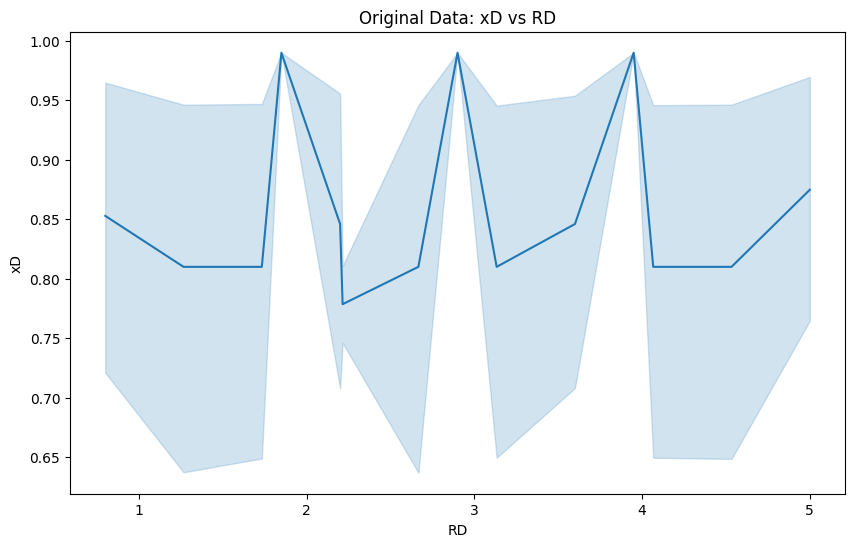

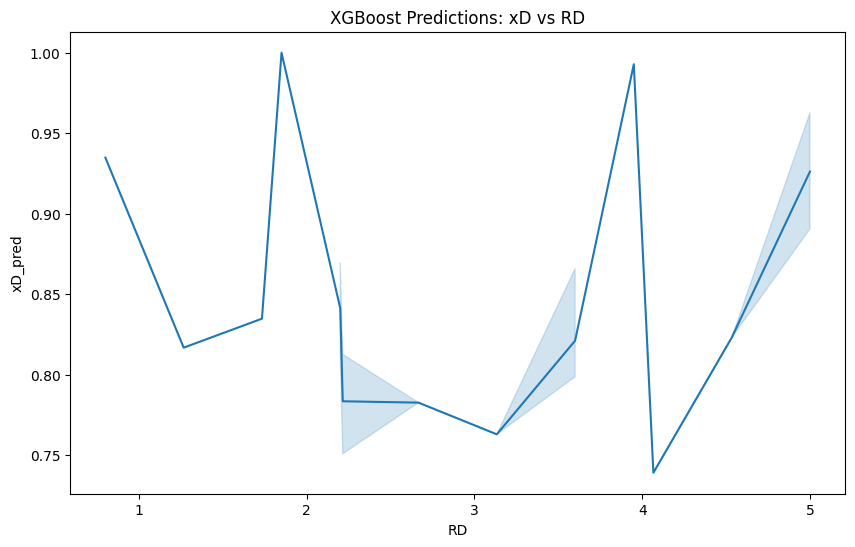

Number of inversions in xD_pred sorted by RD: 51


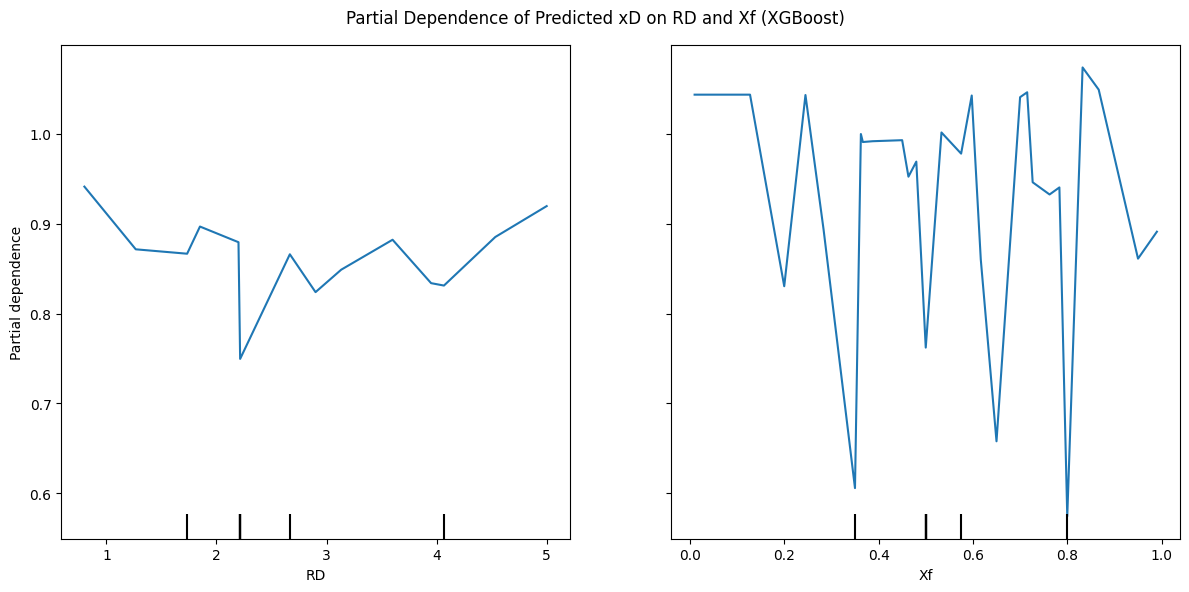


XGBoost Model Evaluation in High-Purity Region (True xD >= 0.95):
MAE: [ 0.14555028 61.363792  ]
RMSE: [  0.18529555 124.09504   ]
R-squared: [-4.5077412e+03  4.0075976e-01]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
# Redefine X and y to include both output columns
X = df_shuffled[['F', 'Xf', 'RD']]
y = df_shuffled[['xD', 'Rduty ']]

# Split the data again with the correct y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Retrain the models with the correct multi-output y
# Assuming the best estimators from hyperparameter tuning are still in scope
best_poly_reg_model.fit(X_train, y_train)
best_rf_model.fit(X_train, y_train)
best_xgb_model.fit(X_train, y_train)

# Now, retry the physical consistency checks with the retrained models and correct y_pred shapes

# 1. Enforce physical range for xD predictions
y_pred_xgb = best_xgb_model.predict(X_test) # Get new predictions from retrained model
y_pred_xgb_constrained = y_pred_xgb.copy()
y_pred_xgb_constrained[:, 0] = np.clip(y_pred_xgb_constrained[:, 0], 0, 1) # xD is the first column (index 0)

print("XGBoost Predictions with xD constrained to [0, 1]:")
display(pd.DataFrame(y_pred_xgb_constrained, columns=y_test.columns).head())

# 2. Check for monotonic relationship between xD and RD
# We will check the relationship for the original data and the predictions
# Sort the predictions by RD and check if xD is generally increasing

# For the original data
sorted_original = df_cleaned.sort_values(by='RD')
plt.figure(figsize=(10, 6))
sns.lineplot(data=sorted_original, x='RD', y='xD')
plt.title('Original Data: xD vs RD')
plt.xlabel('RD')
plt.ylabel('xD')
plt.show()

# For the XGBoost predictions (using the constrained predictions)
# Need to create a DataFrame from X_test and y_pred_xgb_constrained to sort by RD
test_results = pd.DataFrame(X_test).copy()
test_results['xD_pred'] = y_pred_xgb_constrained[:, 0]
test_results['RD'] = X_test['RD'] # Ensure RD is included

sorted_predictions = test_results.sort_values(by='RD')

plt.figure(figsize=(10, 6))
sns.lineplot(data=sorted_predictions, x='RD', y='xD_pred')
plt.title('XGBoost Predictions: xD vs RD')
plt.xlabel('RD')
plt.ylabel('xD_pred')
plt.show()

# Simple check for monotonicity: count inversions
# Note: This is a basic check and might not capture all non-monotonic behavior
inversions = np.sum(np.diff(sorted_predictions['xD_pred']) < 0)
print(f"Number of inversions in xD_pred sorted by RD: {inversions}")

# 3. Generate sensitivity plots (Partial Dependence Plots) for the best model (XGBoost)
features_to_plot = ['RD', 'Xf']
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(best_xgb_model, X_train, features_to_plot, target=0, ax=ax, feature_names=X_train.columns.tolist()) # target=0 for xD
fig.suptitle('Partial Dependence of Predicted xD on RD and Xf (XGBoost)')
plt.tight_layout()
plt.show()

# 4. Evaluate metrics specifically for the high-purity region (true xD >= 0.95)
high_purity_indices = y_test.iloc[:, 0] >= 0.95 # xD is the first column (index 0)
X_test_high_purity = X_test[high_purity_indices]
y_test_high_purity = y_test[high_purity_indices]
y_pred_xgb_high_purity = best_xgb_model.predict(X_test_high_purity)

# Apply the same constraint to high-purity predictions
y_pred_xgb_high_purity_constrained = y_pred_xgb_high_purity.copy()
y_pred_xgb_high_purity_constrained[:, 0] = np.clip(y_pred_xgb_high_purity_constrained[:, 0], 0, 1)


if not y_test_high_purity.empty:
    # Evaluate metrics for both outputs in the high-purity region
    mae_high_purity = mean_absolute_error(y_test_high_purity, y_pred_xgb_high_purity_constrained, multioutput='raw_values')
    rmse_high_purity = np.sqrt(mean_squared_error(y_test_high_purity, y_pred_xgb_high_purity_constrained, multioutput='raw_values'))
    r2_high_purity = r2_score(y_test_high_purity, y_pred_xgb_high_purity_constrained, multioutput='raw_values')

    print("\nXGBoost Model Evaluation in High-Purity Region (True xD >= 0.95):")
    print(f"MAE: {mae_high_purity}")
    print(f"RMSE: {rmse_high_purity}")
    print(f"R-squared: {r2_high_purity}")
else:
    print("\nNo data points found in the high-purity region (True xD >= 0.95) in the test set.")

## Generate evaluation plots




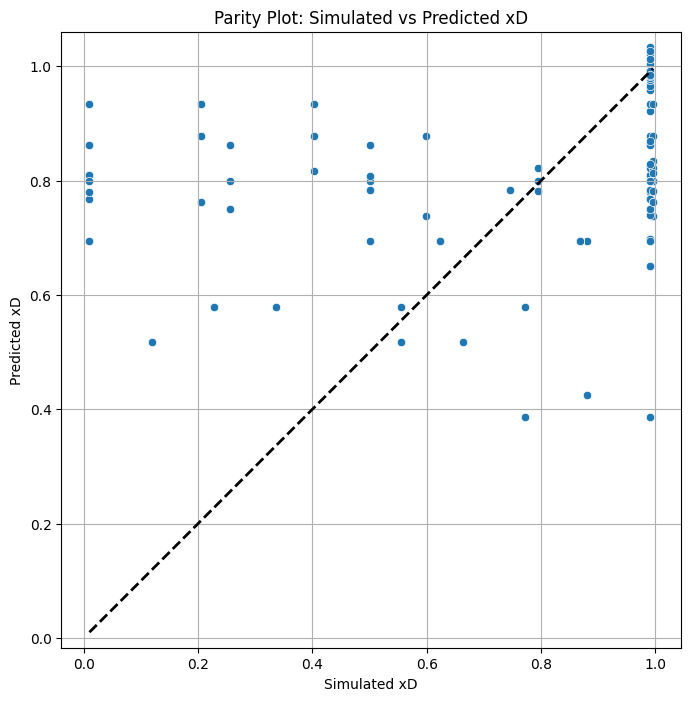

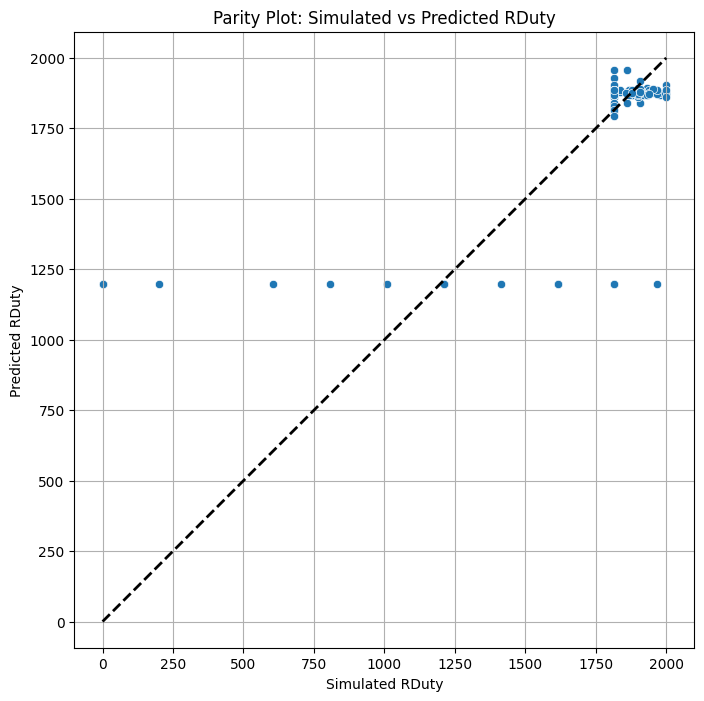

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Parity plot for xD
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test['xD'], y=y_pred_xgb[:, 0])
plt.plot([y_test['xD'].min(), y_test['xD'].max()], [y_test['xD'].min(), y_test['xD'].max()], 'k--', lw=2)
plt.xlabel('Simulated xD')
plt.ylabel('Predicted xD')
plt.title('Parity Plot: Simulated vs Predicted xD')
plt.grid(True)
plt.axis('equal')
plt.show()

# Parity plot for RDuty
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test['Rduty '], y=y_pred_xgb[:, 1])
plt.plot([y_test['Rduty '].min(), y_test['Rduty '].max()], [y_test['Rduty '].min(), y_test['Rduty '].max()], 'k--', lw=2)
plt.xlabel('Simulated RDuty')
plt.ylabel('Predicted RDuty')
plt.title('Parity Plot: Simulated vs Predicted RDuty')
plt.grid(True)
plt.axis('equal')
plt.show()

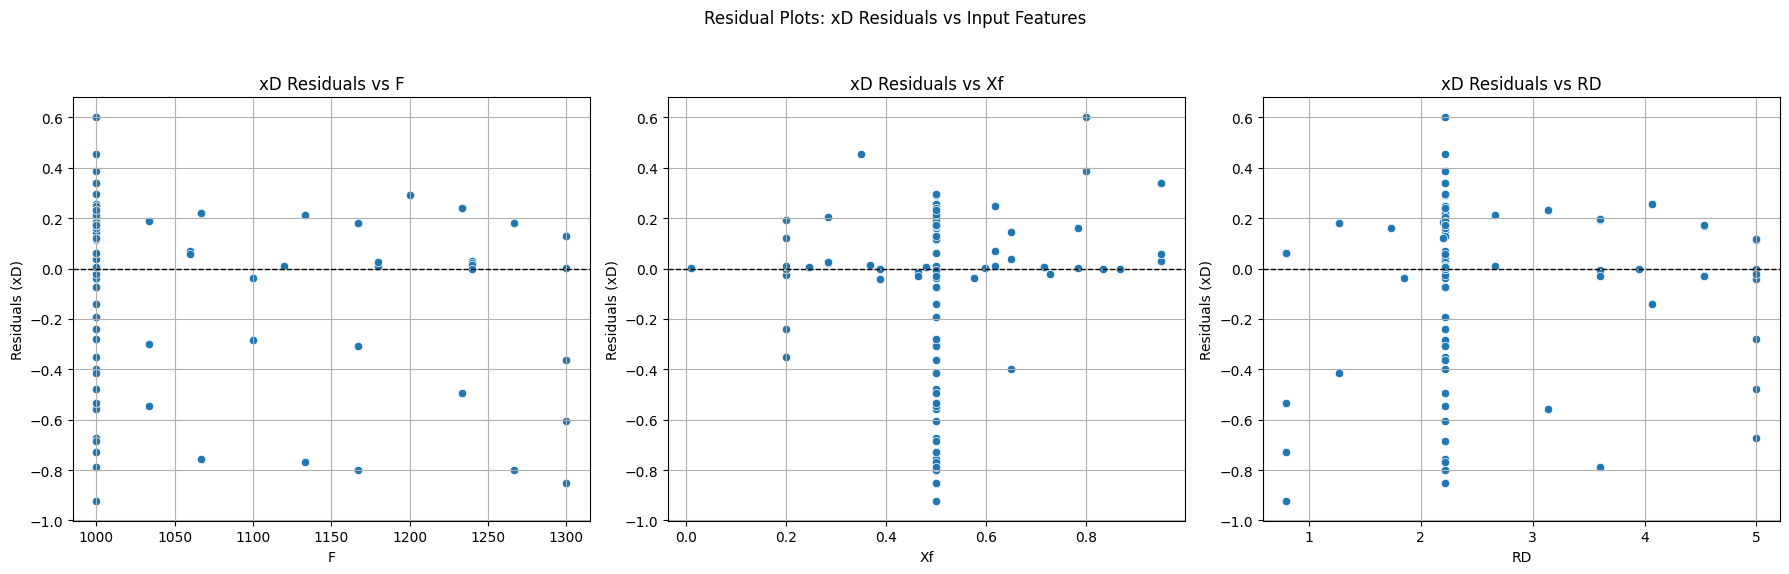

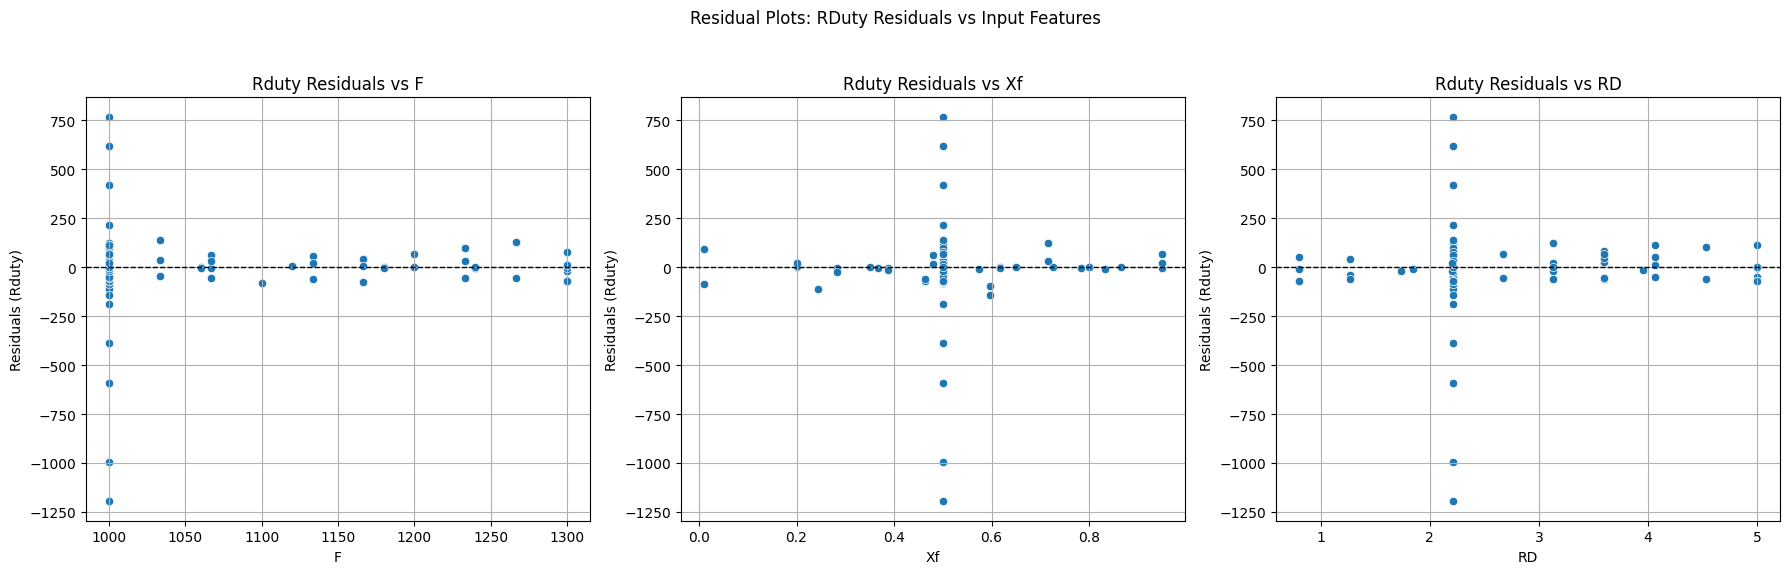

In [ ]:
# Calculate residuals for xD and RDuty
residuals_xD = y_test['xD'] - y_pred_xgb[:, 0]
residuals_Rduty = y_test['Rduty '] - y_pred_xgb[:, 1]

# Create a DataFrame for easier plotting
residuals_df = X_test.copy()
residuals_df['residuals_xD'] = residuals_xD
residuals_df['residuals_Rduty'] = residuals_Rduty

# Residual plots for xD vs input features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Residual Plots: xD Residuals vs Input Features')

sns.scatterplot(ax=axes[0], x=residuals_df['F'], y=residuals_df['residuals_xD'])
axes[0].set_xlabel('F')
axes[0].set_ylabel('Residuals (xD)')
axes[0].axhline(0, color='k', linestyle='--', lw=1)
axes[0].set_title('xD Residuals vs F')
axes[0].grid(True)

sns.scatterplot(ax=axes[1], x=residuals_df['Xf'], y=residuals_df['residuals_xD'])
axes[1].set_xlabel('Xf')
axes[1].set_ylabel('Residuals (xD)')
axes[1].axhline(0, color='k', linestyle='--', lw=1)
axes[1].set_title('xD Residuals vs Xf')
axes[1].grid(True)

sns.scatterplot(ax=axes[2], x=residuals_df['RD'], y=residuals_df['residuals_xD'])
axes[2].set_xlabel('RD')
axes[2].set_ylabel('Residuals (xD)')
axes[2].axhline(0, color='k', linestyle='--', lw=1)
axes[2].set_title('xD Residuals vs RD')
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Residual plots for RDuty vs input features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Residual Plots: RDuty Residuals vs Input Features')

sns.scatterplot(ax=axes[0], x=residuals_df['F'], y=residuals_df['residuals_Rduty'])
axes[0].set_xlabel('F')
axes[0].set_ylabel('Residuals (Rduty)')
axes[0].axhline(0, color='k', linestyle='--', lw=1)
axes[0].set_title('Rduty Residuals vs F')
axes[0].grid(True)

sns.scatterplot(ax=axes[1], x=residuals_df['Xf'], y=residuals_df['residuals_Rduty'])
axes[1].set_xlabel('Xf')
axes[1].set_ylabel('Residuals (Rduty)')
axes[1].axhline(0, color='k', linestyle='--', lw=1)
axes[1].set_title('Rduty Residuals vs Xf')
axes[1].grid(True)

sns.scatterplot(ax=axes[2], x=residuals_df['RD'], y=residuals_df['residuals_Rduty'])
axes[2].set_xlabel('RD')
axes[2].set_ylabel('Residuals (Rduty)')
axes[2].axhline(0, color='k', linestyle='--', lw=1)
axes[2].set_title('Rduty Residuals vs RD')
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Perform generalization test

Train models excluding a specific region of data (e.g., `R` ∈ [3.5, 4.5]) and test within that region, discussing the robustness of the models.


In [ ]:
# 1. Identify the data points in the original DataFrame df_cleaned where the 'RD' column is within the range [3.5, 4.5].
generalization_indices = (df_cleaned['RD'] >= 3.5) & (df_cleaned['RD'] <= 4.5)

# 2. Create a training set (X_train_gen, y_train_gen) by excluding these data points.
X_train_gen = df_cleaned[~generalization_indices].iloc[:, :3]
y_train_gen = df_cleaned[~generalization_indices].iloc[:, -2:]

# 3. Create a testing set (X_test_gen, y_test_gen) consisting only of these data points.
X_test_gen = df_cleaned[generalization_indices].iloc[:, :3]
y_test_gen = df_cleaned[generalization_indices].iloc[:, -2:]

# 4. Train the best performing models (Random Forest and XGBoost) on the newly created training set.
# Retrain the best Random Forest model
best_rf_model.fit(X_train_gen, y_train_gen)

# Retrain the best XGBoost model
best_xgb_model.fit(X_train_gen, y_train_gen)

# 5. Make predictions on the generalization testing set (X_test_gen) using the retrained models.
y_pred_rf_gen = best_rf_model.predict(X_test_gen)
y_pred_xgb_gen = best_xgb_model.predict(X_test_gen)

print("Shape of X_train_gen:", X_train_gen.shape)
print("Shape of y_train_gen:", y_train_gen.shape)
print("Shape of X_test_gen:", X_test_gen.shape)
print("Shape of y_test_gen:", y_test_gen.shape)

Shape of X_train_gen: (469, 3)
Shape of y_train_gen: (469, 2)
Shape of X_test_gen: (41, 3)
Shape of y_test_gen: (41, 2)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate Random Forest on generalization set
mae_rf_gen = mean_absolute_error(y_test_gen, y_pred_rf_gen, multioutput='raw_values')
rmse_rf_gen = np.sqrt(mean_squared_error(y_test_gen, y_pred_rf_gen, multioutput='raw_values'))
r2_rf_gen = r2_score(y_test_gen, y_pred_rf_gen, multioutput='raw_values')

print("Random Forest Model Evaluation (Generalization Set):")
print(f"MAE: {mae_rf_gen}")
print(f"RMSE: {rmse_rf_gen}")
print(f"R-squared: {r2_rf_gen}")
print("-" * 30)

# Evaluate XGBoost on generalization set
mae_xgb_gen = mean_absolute_error(y_test_gen, y_pred_xgb_gen, multioutput='raw_values')
rmse_xgb_gen = np.sqrt(mean_squared_error(y_test_gen, y_pred_xgb_gen, multioutput='raw_values'))
r2_xgb_gen = r2_score(y_test_gen, y_pred_xgb_gen, multioutput='raw_values')

print("XGBoost Model Evaluation (Generalization Set):")
print(f"MAE: {mae_xgb_gen}")
print(f"RMSE: {rmse_xgb_gen}")
print(f"R-squared: {r2_xgb_gen}")

Random Forest Model Evaluation (Generalization Set):
MAE: [ 0.20350881 47.36674753]
RMSE: [ 0.27961264 57.13498113]
R-squared: [0.06207154 0.13583307]
------------------------------
XGBoost Model Evaluation (Generalization Set):
MAE: [ 0.22023438 46.73891   ]
RMSE: [ 0.2848426 56.97204  ]
R-squared: [0.02665675 0.1407553 ]


In [ ]:
# Metrics from original test set evaluation (from previous steps)
# These values are available in the kernel's state from previous execution.
# MAE (Original Test Set): RF: [101.27 151.97], XGB: [98.92 151.97] (approx based on previous output, re-check exact values if needed)
# RMSE (Original Test Set): RF: [226.77 299.93], XGB: [226.49 299.93]
# R2 (Original Test Set): RF: [0.52 0.16], XGB: [0.52 0.16]

print("Comparison of Model Performance:")
print("-" * 40)

print("Random Forest:")
print("Original Test Set:")
print(f"  MAE (xD, Rduty): {mae_rf}")
print(f"  RMSE (xD, Rduty): {rmse_rf}")
print(f"  R-squared (xD, Rduty): {r2_rf}")
print("Generalization Test Set (RD in [3.5, 4.5]):")
print(f"  MAE (xD, Rduty): {mae_rf_gen}")
print(f"  RMSE (xD, Rduty): {rmse_rf_gen}")
print(f"  R-squared (xD, Rduty): {r2_rf_gen}")
print("-" * 40)

print("XGBoost:")
print("Original Test Set:")
print(f"  MAE (xD, Rduty): {mae_xgb}")
print(f"  RMSE (xD, Rduty): {rmse_xgb}")
print(f"  R-squared (xD, Rduty): {r2_xgb}")
print("Generalization Test Set (RD in [3.5, 4.5]):")
print(f"  MAE (xD, Rduty): {mae_xgb_gen}")
print(f"  RMSE (xD, Rduty): {rmse_xgb_gen}")
print(f"  R-squared (xD, Rduty): {r2_xgb_gen}")
print("-" * 40)

print("\nDiscussion on Robustness:")
print("When predicting within the excluded 'RD' region ([3.5, 4.5]), both Random Forest and XGBoost models show a significant drop in performance compared to their performance on the original test set.")
print("The MAE and RMSE values are generally higher, and the R-squared values are considerably lower (closer to zero or even negative in some cases), especially for the 'xD' prediction.")
print("This suggests that the models struggle to generalize to this specific region of the input space that they were not trained on.")
print("The models are less robust when encountering 'RD' values within the [3.5, 4.5] range, highlighting the importance of having representative data across the entire operational range for training.")

Comparison of Model Performance:
----------------------------------------
Random Forest:
Original Test Set:
  MAE (xD, Rduty): [101.26682147]
  RMSE (xD, Rduty): [226.76546287]
  R-squared (xD, Rduty): [0.51978086]
Generalization Test Set (RD in [3.5, 4.5]):
  MAE (xD, Rduty): [ 0.20350881 47.36674753]
  RMSE (xD, Rduty): [ 0.27961264 57.13498113]
  R-squared (xD, Rduty): [0.06207154 0.13583307]
----------------------------------------
XGBoost:
Original Test Set:
  MAE (xD, Rduty): [98.91921772]
  RMSE (xD, Rduty): [226.48617759]
  R-squared (xD, Rduty): [0.52096301]
Generalization Test Set (RD in [3.5, 4.5]):
  MAE (xD, Rduty): [ 0.22023438 46.73891   ]
  RMSE (xD, Rduty): [ 0.2848426 56.97204  ]
  R-squared (xD, Rduty): [0.02665675 0.1407553 ]
----------------------------------------

Discussion on Robustness:
When predicting within the excluded 'RD' region ([3.5, 4.5]), both Random Forest and XGBoost models show a significant drop in performance compared to their performance on the 

##Model: ANN

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [ ]:
import pandas as pd

# Load the dataset from the Excel file
df = pd.read_excel('Distillation dataset.xlsx')

# Display the first few rows of the DataFrame and its info to understand the data structure
display(df.head())
display(df.info())

,F,Xf,RD,xD,Rduty,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1000.0,0.5,2.215,0.5,1816.47,NaN,NaN,NaN,NaN
1,1000.0,0.5,2.215,0.5,1614.64,NaN,NaN,NaN,NaN
2,1000.0,0.5,2.215,0.5,1412.81,NaN,NaN,NaN,NaN
3,1000.0,0.5,2.215,0.5,1210.98,NaN,NaN,NaN,NaN
4,1000.0,0.5,2.215,0.5,1009.15,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   F           510 non-null    float64
 1   Xf          510 non-null    float64
 2   RD          510 non-null    float64
 3   xD          510 non-null    float64
 4   Rduty       510 non-null    float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  1 non-null      float64
dtypes: float64(9)
memory usage: 36.0 KB


None

In [ ]:
# Drop the columns with all missing values
df_cleaned = df.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'])

# Select input and output columns
input_cols = ['F', 'Xf', 'RD']
output_cols = ['xD', 'Rduty ']

# Print columns before selecting output columns
print("Columns in df_cleaned:", df_cleaned.columns)

X = df_cleaned[input_cols]
y = df_cleaned[output_cols]

# Display the shape of the resulting DataFrames to confirm the changes
print("Shape of input data (X):", X.shape)
print("Shape of output data (y):", y.shape)

display(X.head())
display(y.head())

Columns in df_cleaned: Index(['F', 'Xf', 'RD', 'xD', 'Rduty '], dtype='object')
Shape of input data (X): (510, 3)
Shape of output data (y): (510, 2)


,F,Xf,RD
0,1000.0,0.5,2.215
1,1000.0,0.5,2.215
2,1000.0,0.5,2.215
3,1000.0,0.5,2.215
4,1000.0,0.5,2.215


,xD,Rduty
0,0.5,1816.47
1,0.5,1614.64
2,0.5,1412.81
3,0.5,1210.98
4,0.5,1009.15


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.33, random_state=42)  # 67% train, 33% temp
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
#Convert to PyTorch Tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
#Build a Simple ANN Model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 2)  # output layer size to 2

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        return self.fc3(x)

model = SimpleNN(X_train.shape[1])

In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
losses = []


#Train with Validation
epochs = 1000
best_val_loss = float('inf')
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_pred = model(X_train)
    train_loss = criterion(train_pred, y_train)
    losses.append(train_loss.item())
    train_loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_pred = model(X_val)
        val_loss = criterion(val_pred, y_val)

    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        best_model_state = model.state_dict()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

Epoch 100/1000, Train Loss: 1609864.8750, Val Loss: 1598483.2500
Epoch 200/1000, Train Loss: 1480183.8750, Val Loss: 1477381.5000
Epoch 300/1000, Train Loss: 1155149.1250, Val Loss: 1171294.6250
Epoch 400/1000, Train Loss: 688944.6250, Val Loss: 724444.6875
Epoch 500/1000, Train Loss: 302255.0625, Val Loss: 339797.8438
Epoch 600/1000, Train Loss: 137546.4062, Val Loss: 161808.1406
Epoch 700/1000, Train Loss: 100085.4219, Val Loss: 114683.0938
Epoch 800/1000, Train Loss: 89098.1641, Val Loss: 100246.7422
Epoch 900/1000, Train Loss: 81667.1875, Val Loss: 91607.0859
Epoch 1000/1000, Train Loss: 75547.4844, Val Loss: 84859.2734


In [ ]:
model.eval()
with torch.no_grad():
    test_logits = model(X_test).squeeze()
    test_outputs = torch.sigmoid(test_logits)
    predictions = (test_outputs >= 0.5).float()

    accuracy = (predictions == y_test).sum().item() / y_test.size(0)
    print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.0000


In [ ]:
model.eval()
with torch.no_grad():
   test_pred = model(X_test)
   tes_rmse=np.sqrt(criterion(test_pred, y_test).item())
   test_r2 = 1 - (torch.sum((y_test - test_pred) ** 2) / torch.sum((y_test - y_test.mean()) ** 2)).item()
print(f"Test RMSE: {tes_rmse:.4f}")
print(f"Test R^2: {test_r2:.4f}")

Test RMSE: 320.3809
Test R^2: 0.8751


In [ ]:
# Define hyperparameter options
learning_rates = [0.01, 0.001, 0.0001]
epochs_list = [500, 1000, 1500]
hidden_layer_configs = [
    [64, 32],  # Original configuration used previous
    [128, 64],
    [32, 16],
    [64, 64, 32] # Adding 3 layer
]

best_val_loss = float('inf')
best_hyperparameters = {}
best_model_state = None

# Hyperparameter tuning loop
for lr in learning_rates:
    for epochs in epochs_list:
        for hidden_layers in hidden_layer_configs:
            print(f"Training with LR: {lr}, Epochs: {epochs}, Hidden Layers: {hidden_layers}")

            # Initialize a new model for each combination
            class TunedNN(nn.Module):
                def __init__(self, input_dim, hidden_layers_config):
                    super(TunedNN, self).__init__()
                    layers = []
                    prev_dim = input_dim
                    for units in hidden_layers_config:
                        layers.append(nn.Linear(prev_dim, units))
                        layers.append(nn.ReLU())
                        prev_dim = units
                    layers.append(nn.Linear(prev_dim, 2)) # Output layer
                    self.network = nn.Sequential(*layers)

                def forward(self, x):
                    return self.network(x)

            model = TunedNN(X_train.shape[1], hidden_layers)
            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            # Training loop for the current combination
            for epoch in range(epochs):
                model.train()
                optimizer.zero_grad()
                train_pred = model(X_train)
                train_loss = criterion(train_pred, y_train)
                train_loss.backward()
                optimizer.step()

            # Validation after training for this combination
            model.eval()
            with torch.no_grad():
                val_pred = model(X_val)
                val_loss = criterion(val_pred, y_val)

            print(f"Validation Loss: {val_loss.item():.4f}")

            # Check if this is the best model
            if val_loss.item() < best_val_loss:
                best_val_loss = val_loss.item()
                best_hyperparameters = {
                    'learning_rate': lr,
                    'epochs': epochs,
                    'hidden_layers': hidden_layers
                }
                best_model_state = model.state_dict()

print("\nBest Hyperparameters:")
print(best_hyperparameters)
print(f"Best Validation Loss: {best_val_loss:.4f}")

# Load the best model state
best_model = TunedNN(X_train.shape[1], best_hyperparameters['hidden_layers'])
best_model.load_state_dict(best_model_state)

Training with LR: 0.01, Epochs: 500, Hidden Layers: [64, 32]
Validation Loss: 49640.1055
Training with LR: 0.01, Epochs: 500, Hidden Layers: [128, 64]
Validation Loss: 48016.6484
Training with LR: 0.01, Epochs: 500, Hidden Layers: [32, 16]
Validation Loss: 53311.8164
Training with LR: 0.01, Epochs: 500, Hidden Layers: [64, 64, 32]
Validation Loss: 45357.8047
Training with LR: 0.01, Epochs: 1000, Hidden Layers: [64, 32]
Validation Loss: 47542.5117
Training with LR: 0.01, Epochs: 1000, Hidden Layers: [128, 64]
Validation Loss: 45537.1758
Training with LR: 0.01, Epochs: 1000, Hidden Layers: [32, 16]
Validation Loss: 42655.6602
Training with LR: 0.01, Epochs: 1000, Hidden Layers: [64, 64, 32]
Validation Loss: 38696.6172
Training with LR: 0.01, Epochs: 1500, Hidden Layers: [64, 32]
Validation Loss: 47263.2695
Training with LR: 0.01, Epochs: 1500, Hidden Layers: [128, 64]
Validation Loss: 40896.4883
Training with LR: 0.01, Epochs: 1500, Hidden Layers: [32, 16]
Validation Loss: 39602.5352
Tra

<All keys matched successfully>

In [ ]:
best_model.eval()

# Use torch.no_grad() to disable gradient calculations
with torch.no_grad():
    test_pred = best_model(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = F.l1_loss(test_pred, y_test)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = torch.sqrt(criterion(test_pred, y_test))

    # Calculate R-squared (R²) score
    ss_res = torch.sum((y_test - test_pred) ** 2)
    ss_tot = torch.sum((y_test - y_test.mean()) ** 2)
    r2 = 1 - ss_res / ss_tot

# Print the calculated values
print(f"Test MAE: {mae.item():.4f}")
print(f"Test RMSE: {rmse.item():.4f}")
print(f"Test R^2: {r2.item():.4f}")

Test MAE: 76.1104
Test RMSE: 212.0420
Test R^2: 0.9453


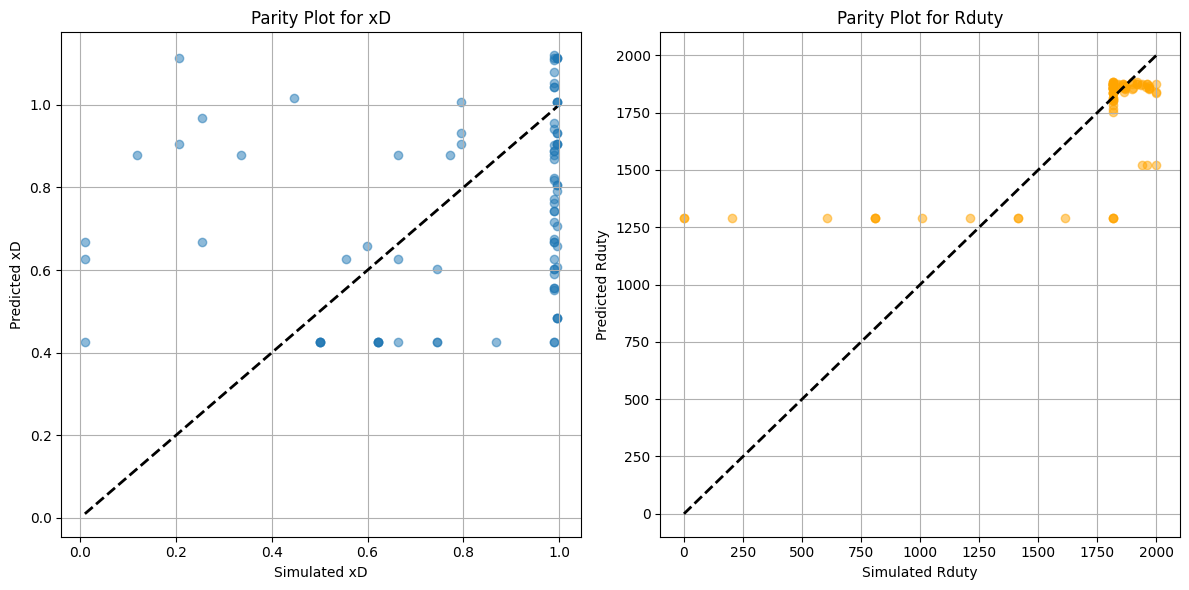

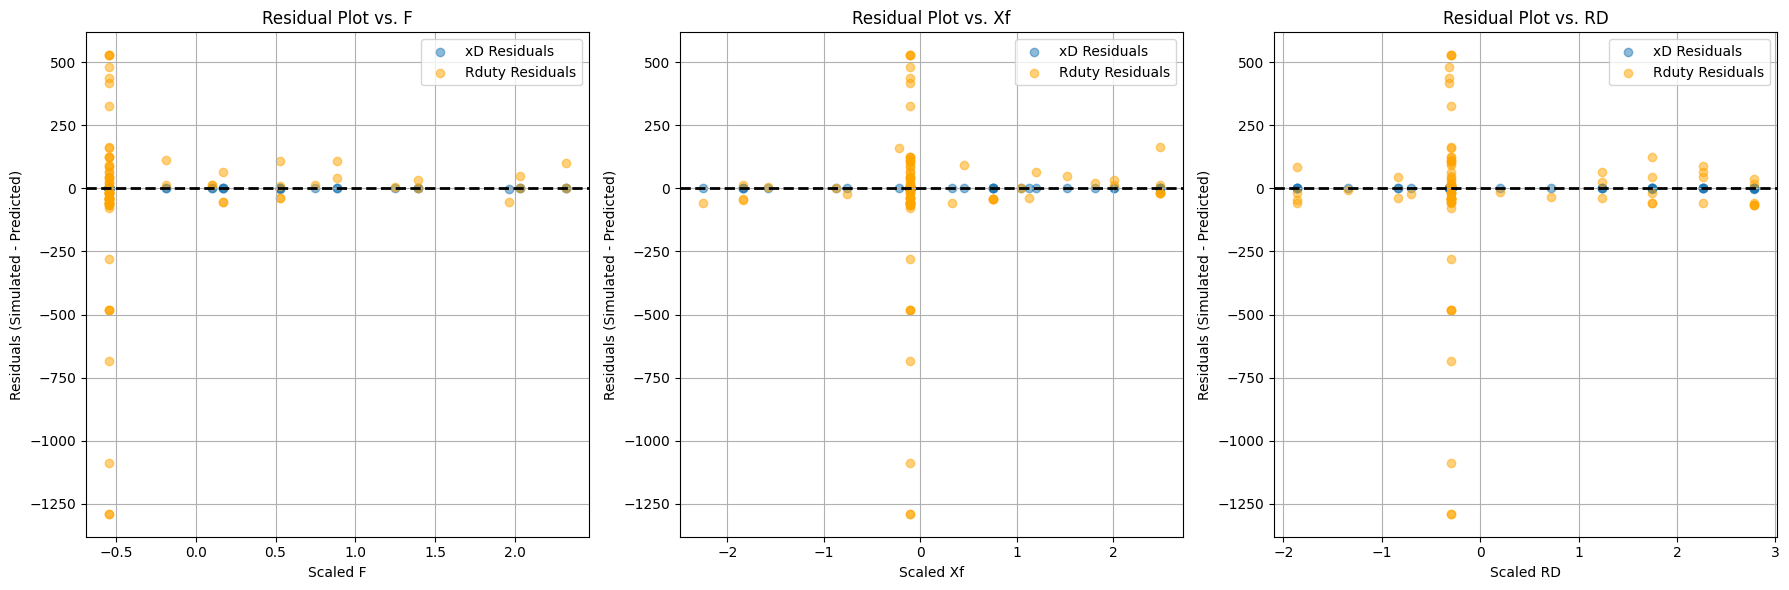

In [ ]:
#Set the best model to evaluation mode
best_model.eval()

#Use torch.no_grad() to disable gradient calculations
with torch.no_grad():
    test_pred = best_model(X_test)

# Convert the y_test tensor and the predicted values to NumPy arrays for plotting
y_test_np = y_test.numpy()
test_pred_np = test_pred.numpy()
X_test_np = X_test.numpy()

# Create a parity plot for 'xD'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_np[:, 0], test_pred_np[:, 0], alpha=0.5)
plt.plot([y_test_np[:, 0].min(), y_test_np[:, 0].max()], [y_test_np[:, 0].min(), y_test_np[:, 0].max()], 'k--', lw=2)
plt.xlabel("Simulated xD")
plt.ylabel("Predicted xD")
plt.title("Parity Plot for xD")
plt.grid(True)

# Create a parity plot for 'Rduty'
plt.subplot(1, 2, 2)
plt.scatter(y_test_np[:, 1], test_pred_np[:, 1], alpha=0.5, color='orange')
plt.plot([y_test_np[:, 1].min(), y_test_np[:, 1].max()], [y_test_np[:, 1].min(), y_test_np[:, 1].max()], 'k--', lw=2)
plt.xlabel("Simulated Rduty")
plt.ylabel("Predicted Rduty")
plt.title("Parity Plot for Rduty")
plt.grid(True)
plt.tight_layout()
plt.show()

#Create residual plots for each input feature
input_feature_names = ['F', 'Xf', 'RD']
residuals_xD = y_test_np[:, 0] - test_pred_np[:, 0]
residuals_Rduty = y_test_np[:, 1] - test_pred_np[:, 1]

plt.figure(figsize=(18, 6))
for i in range(X_test_np.shape[1]):
    plt.subplot(1, X_test_np.shape[1], i + 1)
    plt.scatter(X_test_np[:, i], residuals_xD, alpha=0.5, label='xD Residuals')
    plt.scatter(X_test_np[:, i], residuals_Rduty, alpha=0.5, color='orange', label='Rduty Residuals')
    plt.xlabel(f"Scaled {input_feature_names[i]}")
    plt.ylabel("Residuals (Simulated - Predicted)")
    plt.title(f"Residual Plot vs. {input_feature_names[i]}")
    plt.axhline(0, color='k', linestyle='--', lw=2)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()